In [1]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
num_classes = 2

In [3]:
from tensorflow.keras.optimizers import Adam

In [4]:
# load the ResNet50 model and add a few layers on top
model = Sequential()
model.add(ResNet50(include_top=False, pooling='avg', weights='imagenet'))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

94765736/94765736 [==============================] - 32s 0us/step


In [5]:
for layer in model.layers[0].layers:
    layer.trainable = False

In [6]:
# compile the model
model.compile(optimizer=Adam(lr = 0.001), loss='categorical_crossentropy', metrics=['accuracy'])

C:\Users\Neetiraj\AppData\Roaming\Python\Python39\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


# Augumented data

In [7]:
# define the data generators for training, validation, and test sets
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

In [8]:
validation_datagen = ImageDataGenerator(rescale=1./255)

In [9]:
train_dir = r"C:\Users\Neetiraj\Videos\archive\traindata\traindata"
val_dir = r"C:\Users\Neetiraj\Videos\archive\testdata\testdata"

In [10]:
# create the generators for the training, validation, and test sets
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(224, 224),
                                                    batch_size=32,
                                                    class_mode='categorical')

Found 2891 images belonging to 2 classes.


In [11]:
validation_generator = validation_datagen.flow_from_directory(val_dir,
                                                              target_size=(224, 224),
                                                              batch_size=32,
                                                              class_mode='categorical')

Found 1330 images belonging to 2 classes.


In [12]:
# train the model
history = model.fit_generator(train_generator,
                              epochs=10,
                              validation_data=validation_generator,
                              steps_per_epoch=len(train_generator),
                              validation_steps=len(validation_generator))

C:\Users\Neetiraj\AppData\Local\Temp\ipykernel_13844\2123495152.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


Epoch 1/10
91/91 [==============================] - 680s 7s/step - loss: 0.7633 - accuracy: 0.5922 - val_loss: 0.6646 - val_accuracy: 0.6361
Epoch 2/10
91/91 [==============================] - 479s 5s/step - loss: 0.6484 - accuracy: 0.6375 - val_loss: 0.6100 - val_accuracy: 0.6857
Epoch 3/10
91/91 [==============================] - 454s 5s/step - loss: 0.6366 - accuracy: 0.6593 - val_loss: 0.6061 - val_accuracy: 0.6917
Epoch 4/10
91/91 [==============================] - 464s 5s/step - loss: 0.6394 - accuracy: 0.6558 - val_loss: 0.6023 - val_accuracy: 0.6880
Epoch 5/10
91/91 [==============================] - 485s 5s/step - loss: 0.6321 - accuracy: 0.6586 - val_loss: 0.6077 - val_accuracy: 0.6940
Epoch 6/10
91/91 [==============================] - 399s 4s/step - loss: 0.6351 - accuracy: 0.6503 - val_loss: 0.5953 - val_accuracy: 0.6895
Epoch 7/10
91/91 [==============================] - 367s 4s/step - loss: 0.6336 - accuracy: 0.6589 - val_loss: 0.5973 - val_accuracy: 0.6895
Epoch 8/10
91

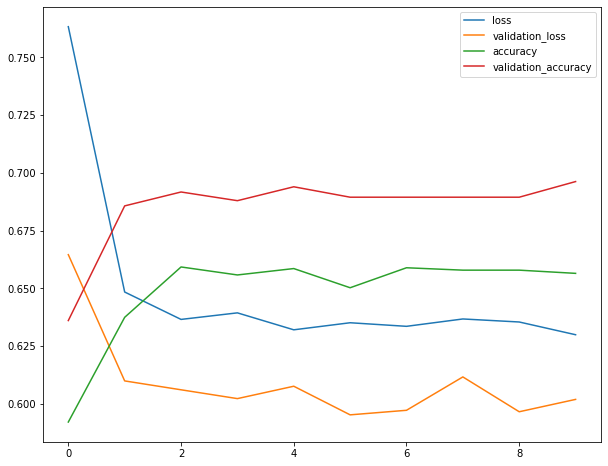

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize =(10,8))
plt.plot(history.history['loss'],label= 'loss')
plt.plot(history.history['val_loss'], label = 'validation_loss')
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.plot(history.history['val_accuracy'], label = 'validation_accuracy')
plt.legend()
plt.show()

# Without Augumentaion

In [14]:
# define the data generators for training, validation, and test sets
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
train_dir = r"C:\Users\Neetiraj\Videos\archive\traindata\traindata"
val_dir = r"C:\Users\Neetiraj\Videos\archive\testdata\testdata"


In [15]:
# create the generators for the training, validation, and test sets
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(224, 224),
                                                    batch_size=32,
                                                    class_mode='categorical')
# create the generators for the training, validation, and test sets
val_generator = validation_datagen.flow_from_directory(val_dir,
                                                    target_size=(224, 224),
                                                    batch_size=32,
                                                    class_mode='categorical')

Found 2891 images belonging to 2 classes.
Found 1330 images belonging to 2 classes.


In [16]:
# train the model
history = model.fit_generator(train_generator,
                              epochs=10,
                              validation_data=validation_generator,
                              steps_per_epoch=len(train_generator),
                              validation_steps=len(validation_generator))

C:\Users\Neetiraj\AppData\Local\Temp\ipykernel_13844\2123495152.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


Epoch 1/10
91/91 [==============================] - 481s 5s/step - loss: 0.6232 - accuracy: 0.6600 - val_loss: 0.5924 - val_accuracy: 0.6970
Epoch 2/10
91/91 [==============================] - 467s 5s/step - loss: 0.6258 - accuracy: 0.6624 - val_loss: 0.5868 - val_accuracy: 0.6985
Epoch 3/10
91/91 [==============================] - 561s 6s/step - loss: 0.6223 - accuracy: 0.6600 - val_loss: 0.5872 - val_accuracy: 0.6992
Epoch 4/10
91/91 [==============================] - 631s 7s/step - loss: 0.6205 - accuracy: 0.6617 - val_loss: 0.6051 - val_accuracy: 0.7060
Epoch 5/10
91/91 [==============================] - 583s 6s/step - loss: 0.6238 - accuracy: 0.6652 - val_loss: 0.5864 - val_accuracy: 0.7105
Epoch 6/10
91/91 [==============================] - 489s 5s/step - loss: 0.6198 - accuracy: 0.6621 - val_loss: 0.5862 - val_accuracy: 0.6992
Epoch 7/10
91/91 [==============================] - 501s 6s/step - loss: 0.6149 - accuracy: 0.6631 - val_loss: 0.5822 - val_accuracy: 0.7075
Epoch 8/10
91

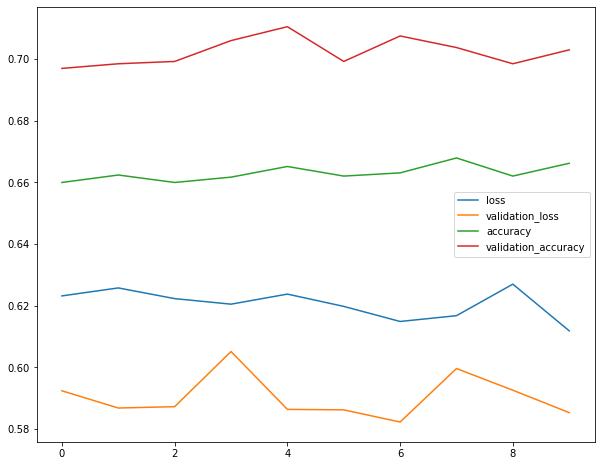

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize =(10,8))
plt.plot(history.history['loss'],label= 'loss')
plt.plot(history.history['val_loss'], label = 'validation_loss')
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.plot(history.history['val_accuracy'], label = 'validation_accuracy')
plt.legend()
plt.show()